# Section 1 Examples

**ME 8613**

**Author:** Aaron Smith

**Date Submitted:** January 21st, 2025

## Example 1.1

**Given:** A simple mass-spring system with m=1, k=1, no input, x(0) = 1, v(0) = 0. 

The system equation is given by $m\cdot\ddot{x}+k\cdot x = 0$.

**Find:**
a) Use Euler's method with a step size of 0.03 to numerically solve for a time of 15 s and compare to the exact solution. 

b) Repeat a) with a step size of 0.01. 

c) Use a 4th order RK method with a step size of 0.03 to numerically solve and compare to the exact solution. 

**Solution:**
The first step is to write the system equations in state variable form as follows:

$\frac{d}{dt}(States) = \begin{bmatrix} 0 & 1 \\ \frac{-k}{m} & 0 \end{bmatrix} \cdot States$

Where the state vector is defined as: 

$States = \begin{bmatrix} x\\v\end{bmatrix}$

In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#Defining known values
k = 1
m = 1
x_0 = 1
v_0 = 0
A = np.array([[0, 1], [-k/m, 0]])

a) Applying Euler's method with a time step of 0.03 s for a simulation of 0s to 15s requires 500 time steps.

---

**Part a) Answer**

a) In the plot below the Euler's method with a time step of 0.03 s matches the exact solution somewhat.



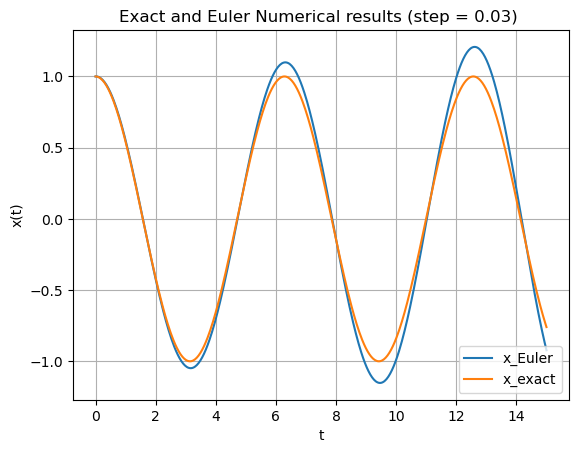

---

In [6]:
#Set up for performing numerical caluculation
steps = 500                 #Set the number of steps for the simulation
tf = 15                     #Define the final time of the simulation
dt=tf/steps                 #Define the time step size 
t= np.linspace(0,tf, steps) #Create a vector of times from 0 to tf in the defined number of steps
s = np.zeros((2,steps))     #Creating a blank matrix to hold the solutions it is a 2xsteps matrix
s[0,0] = x_0                #Defining the first initial condition in the solution matrix
s[1,0] = v_0                #Defining the second initial condition in the solution matrix

#Use Euler's method to solve for future values of the state variables
for i in range(steps-1):
    s[:,i+1]=(A@s[:,i])*dt+s[:,i]

#exact solution for comparison
w_n = np.sqrt(k/m)
x_exact = 1*np.cos(w_n*t)

#Calculate the total accumulated truncation error.
E = 0
for i in range(steps):
    E = np.abs(s[0,i]-x_exact[i])+E

from IPython.display import display, Markdown, Latex
#this section will dynamically update from the previous cell using markdown styling

display(Markdown('---'))
display(Markdown('**Part a) Answer**'))
print(f"a) In the plot below the Euler's method with a time step of 0.03 s matches the exact solution somewhat.")
print()
plt.plot(t,s[0,:],'-',t,x_exact,'-')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('x(t)')
plt.legend(('x_Euler', 'x_exact'),loc=0)
plt.title('Exact and Euler Numerical results (step = 0.03) ')
plt.show()
print()
display(Markdown('---'))

b) Applying Euler's method with a time step of 0.01 s for a simulation of 0s to 15s requires 1500 time steps.

---

**Part b) Answer**

b) In the plot below the Euler's method with a time step of 0.01 matches the exact solution much better.



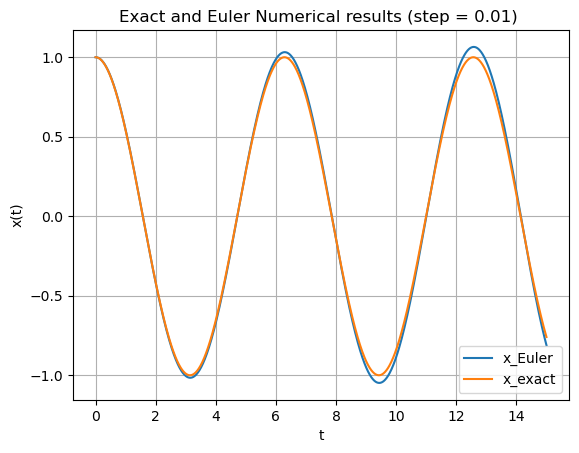

---

In [8]:
#Set up for performing numerical caluculation
steps = 1500                 #Set the number of steps for the simulation
tf = 15                     #Define the final time of the simulation
dt=tf/steps                 #Define the time step size 
t= np.linspace(0,tf, steps) #Create a vector of times from 0 to tf in the defined number of steps
s = np.zeros((2,steps))     #Creating a blank matrix to hold the solutions it is a 2xsteps matrix
s[0,0] = x_0                #Defining the first initial condition in the solution matrix
s[1,0] = v_0                #Defining the second initial condition in the solution matrix

#Use Euler's method to solve for future values of the state variables
for i in range(steps-1):
    s[:,i+1]=(A@s[:,i])*dt+s[:,i]

#exact solution for comparison
w_n = np.sqrt(k/m)
x_exact = 1*np.cos(w_n*t)

#Calculate the total accumulated truncation error.
E = 0
for i in range(steps):
    E = np.abs(s[0,i]-x_exact[i])+E

from IPython.display import display, Markdown, Latex
#this section will dynamically update from the previous cell using markdown styling

display(Markdown('---'))
display(Markdown('**Part b) Answer**'))
print(f"b) In the plot below the Euler's method with a time step of 0.01 matches the exact solution much better.")
print()
plt.plot(t,s[0,:],'-',t,x_exact,'-')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('x(t)')
plt.legend(('x_Euler', 'x_exact'),loc=0)
plt.title('Exact and Euler Numerical results (step = 0.01) ')
plt.show()
print()
display(Markdown('---'))

c) Applying a 4th order runge kutta method with a time step of 0.03 s for a simulation of 0s to 15s requires 500 time steps.

---

**Part c) Answer**

c) In the plot below the 4th order RK method matches the exact solution very well even with the larger time step of 0.03s.



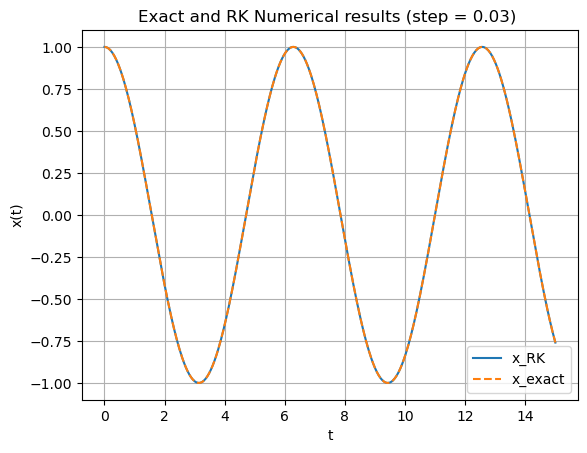

---

In [10]:
from  ODE_solvers import RK4

# Define vector of RHS of first order equations 
def F(t,s):
    F = np.dot(A,s)      #Performs the matrix multiplication
    return F

t = 0.0                   # Start of integration
s = np.array([x_0, v_0])  # initial values for states 
dt = 0.03                 # step size
steps = 500
#Use 4th order RK method to numerically solve
T,S = RK4(F,t,s,tf,dt)

#exact solutions
x_exact = 1*np.cos(w_n*T)

display(Markdown('---'))
display(Markdown('**Part c) Answer**'))
print(f"c) In the plot below the 4th order RK method matches the exact solution very well even with the larger time step of 0.03s.")
print()
plt.plot(T,S[:,0],'-',T,x_exact,'--')
plt.grid(True)
plt.xlabel('t'); plt.ylabel('x(t)')
plt.legend(('x_RK', 'x_exact'),loc=0)
plt.title('Exact and RK Numerical results (step = 0.03) ')
plt.show()
print()
display(Markdown('---'))

**Verification:** The runge kutta method should match the exact solution very well. In the plots above, it can be seen that the numerical results of the runge kutta method matches the exact solution better than the results using Euler's method. The RK method performs better even when using a time step that is 3 times larger. 